In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:/gitfolder/Datasets/sales_data.csv")

In [3]:
data.head(3)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,03-02-2023,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,21-04-2023,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,21-09-2023,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David


In [4]:
data.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [6]:
data.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [7]:
data['Sale_Date']=pd.to_datetime(data['Sale_Date'],format="%d-%m-%Y")

In [8]:
data.head(3)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David


In [9]:
#Average sales in each region
region_wise_sales=data.groupby('Region')['Sales_Amount'].mean()
region_wise_sales

Region
East     4790.087186
North    5129.634869
South    5107.304690
West     5063.971025
Name: Sales_Amount, dtype: float64

In [10]:
#region with maximum average Sales
region_wise_max_sales=data.groupby('Region')['Sales_Amount'].mean().idxmax()
region_wise_max_sales

'North'

In [11]:
#Which product category has the highest sales?
Product_Category=data.groupby('Product_Category')['Sales_Amount'].sum().idxmax()
Product_Category

'Clothing'

In [12]:
#Which sales representative generated the maximum revenue in each region?
salesperson_data=data.groupby(['Sales_Rep','Region'])['Sales_Amount'].sum().reset_index().max()
salesperson_data

Sales_Rep             Eve
Region               West
Sales_Amount    311416.99
dtype: object

In [13]:
#What is the total quantity sold across all products?
total_quantity=data.groupby('Product_Category')['Quantity_Sold'].sum()
total_quantity

Product_Category
Clothing       6922
Electronics    6096
Food           5608
Furniture      6729
Name: Quantity_Sold, dtype: int64

In [14]:
data['Month']=data['Sale_Date'].dt.month

In [15]:
data.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep', 'Month'],
      dtype='object')

In [16]:
#How do sales vary month-wise?
month_wise_sales=data.groupby('Month')['Sales_Amount'].sum()
month_wise_sales

Month
1     495420.37
2     368919.36
3     402638.77
4     438992.61
5     389078.76
6     418458.34
7     374242.88
8     443171.28
9     367837.60
10    460378.78
11    467482.90
12    392643.58
Name: Sales_Amount, dtype: float64

In [17]:
#Which month recorded the highest sales?
month_wise_sales.idxmax()

np.int32(1)

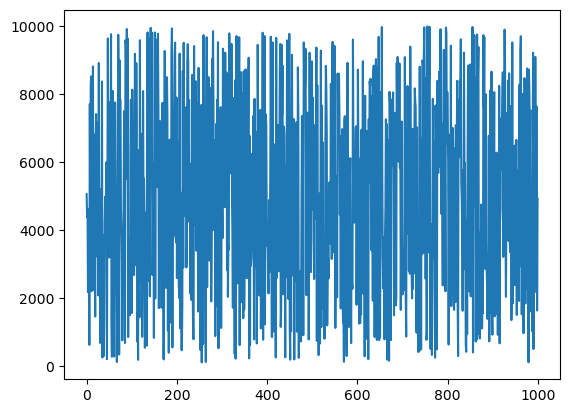

In [18]:
#Is there any seasonal trend in sales
plt.plot(data['Sales_Amount'])
plt.show()

In [19]:
#Which date has the highest single-day sales?
data['Date']=data['Sale_Date'].dt.date
single_day_sales=data.groupby('Date')['Sales_Amount'].sum().idxmax()
single_day_sales

datetime.date(2023, 10, 20)

In [20]:
data.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep', 'Month', 'Date'],
      dtype='object')

In [21]:
#Which product category has the highest average unit price?
highest_average_unit_price=data.groupby('Product_Category')['Unit_Price'].mean().idxmax()
highest_average_unit_price

'Electronics'

In [22]:
data['Profit']=(data['Unit_Price']-data['Unit_Cost'])*data['Quantity_Sold']

In [23]:
data.head(2)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Month,Date,Profit
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2,2023-02-03,2060.46
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,4,2023-04-21,6681.85


In [24]:
data=data.drop(columns=['Region_and_Sales_Rep'])

In [25]:
data.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel', 'Month',
       'Date', 'Profit'],
      dtype='object')

In [26]:
#Which category provides the highest profit per unit?
high_profit_unit=data.groupby('Product_Category')['Profit'].sum()
high_profit_unit

Product_Category
Clothing       1712957.80
Electronics    1574320.06
Food           1421108.05
Furniture      1779461.16
Name: Profit, dtype: float64

In [27]:
high_profit_unit.idxmax()

'Furniture'

In [28]:
data.head(3)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Month,Date,Profit
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,2,2023-02-03,2060.46
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,4,2023-04-21,6681.85
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,9,2023-09-21,3295.20


In [29]:
#Which customer type (New vs Returning) generates more sales?
customer_type_sales=data.groupby('Customer_Type')['Sales_Amount'].sum()
customer_type_sales

Customer_Type
New          2506258.30
Returning    2513006.93
Name: Sales_Amount, dtype: float64

In [30]:
customer_type_sales.idxmax()

'Returning'

In [31]:
returning_data=data[data['Customer_Type']=='Returning']
returning_data

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Month,Date,Profit
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,2,2023-02-03,2060.46
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,4,2023-04-21,6681.85
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,9,2023-09-21,3295.20
6,1083,2023-04-11,Bob,West,618.31,29,Furniture,2408.81,2624.09,Returning,0.14,Cash,Online,4,2023-04-11,6243.12
11,1100,2023-08-14,Bob,West,2198.74,43,Food,1100.81,1137.44,Returning,0.08,Bank Transfer,Online,8,2023-08-14,1575.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,1013,2023-06-01,Charlie,East,2985.46,16,Furniture,1222.15,1284.36,Returning,0.03,Credit Card,Retail,6,2023-06-01,995.36
994,1068,2023-04-06,Alice,South,9093.50,31,Clothing,3169.37,3304.15,Returning,0.25,Credit Card,Retail,4,2023-04-06,4178.18
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,4,2023-04-15,1996.48
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,4,2023-04-27,1403.35


In [32]:
#Do returning customers buy more quantity per order?

In [33]:
more_quantity=returning_data[returning_data['Quantity_Sold']>20]
less_quantity=returning_data[returning_data['Quantity_Sold']<20]

In [34]:
#Is the average discount higher for returning customers?
returning_avg_discount=returning_data['Discount'].mean()
returning_avg_discount

np.float64(0.1530645161290323)

In [35]:
new_customer_data=data[data['Customer_Type']=='New']
new_more_quantity=new_customer_data[new_customer_data['Quantity_Sold']>20]
new_avg_discount=new_customer_data['Discount'].mean()
new_avg_discount

np.float64(0.1517261904761905)

In [36]:
print("Returning customers average discount is higher than New Cutomers"  if(returning_avg_discount>new_avg_discount)  else "New customers average discount is higher than Returning Cutomers") 

Returning customers average discount is higher than New Cutomers


In [37]:
#Which customer type is more profitable?
profitable_customer_type=data.groupby('Customer_Type')['Profit'].sum()
profitable_customer_type.idxmax()

'New'

In [40]:
#How does customer type impact payment method preference?
payment_impact=data.groupby(['Customer_Type','Payment_Method']).count()
payment_impact

Product_ID  Sale_Date  Sales_Rep  Region  \
Customer_Type Payment_Method                                             
New           Bank Transfer          181        181        181     181   
              Cash                   160        160        160     160   
              Credit Card            163        163        163     163   
Returning     Bank Transfer          161        161        161     161   
              Cash                   153        153        153     153   
              Credit Card            182        182        182     182   

                              Sales_Amount  Quantity_Sold  Product_Category  \
Customer_Type Payment_Method                                                  
New           Bank Transfer            181            181               181   
              Cash                     160            160               160   
              Credit Card              163            163               163   
Returning     Bank Transfer            161            161               161   
              Cash                     153            153               153   
              Credit Card              182            182               182   

                              Unit_Cost  Unit_Price  Discount  Sales_Channel  \
Customer_Type Payment_Method                                                   
New           Bank Transfer         181         181       181            181   
              Cash                  160         160       160            160   
              Credit Card           163         163       163            163   
Returning     Bank Transfer         161         161       161            161   
              Cash                  153         153       153            153   
              Credit Card           182         182       182            182   

                              Month  Date  Profit  
Customer_Type Payment_Method                       
New           Bank Transfer     181   181     181  
              Cash              160   160     160  
              Credit Card       163   163     163  
Returning     Bank Transfer     161   161     161  
              Cash              153   153     153  
              Credit Card       182   182     182

In [53]:
#Which payment method is used most frequently?
frequent_payment_method=data.groupby('Payment_Method')
frequent_payment_method['Payment_Method'].count().idxmax()

'Credit Card'

In [59]:
#Do online sales generate more revenue than retail sales?
online_sales=data[data['Sales_Channel']=='Online']['Sales_Amount'].sum()
retail_sales=data[data['Sales_Channel']=='Retail']['Sales_Amount'].sum()
if(online_sales>retail_sales):
    print("online sales generate more revenue than retail sales")
else:
    print("Retail sales generate more revenue than online sales")

Retail sales generate more revenue than online sales
